<h1>Splitting an image into tiles in Python using NumPy</h1>

<h2>Imports</h2>

In [6]:
from PIL import Image
import numpy as np
import cv2

<h3> install opencv (if you don't it already installed)</h3>

In [3]:
# pip install opencv-python

<h3> convert image to array for manipulation </h3>

In [8]:
# image = np.asarray(image)
image = cv2.imread("/Users/melissasiddle/Desktop/1200x1200-Affischer-Posters_2019-12_med-kant_Aquarelle_Flower_-_Blue1.jpeg")

<h3> exploring our image’s dimensions </h3>

In [6]:
image.shape

(1200, 861, 3)

<h3>check that array can be converted back to an image</h3>

In [9]:
image_temp= cv2.imwrite("tempimage.jpg" , image)

<h3>finding best tile height & width</h3>

In [10]:
height_options = [i for i in range(100,200) if image.shape[0]%i== 0]
    
tile_height = height_options[-1]

tile_height

150

In [11]:
width_options = [i for i in range(100,200) if image.shape[1]%i== 0]

tile_width = width_options[-1]

tile_width

123

<h3>after exploration we pick our tile_height and tile_width and split the image accordingly </h3>

In [138]:
img = np.asarray(Image.open("/Users/melissasiddle/Desktop/1200x1200-Affischer-Posters_2019-12_med-kant_Aquarelle_Flower_-_Blue1.jpeg"))

img.shape

(1200, 861, 3)

In [140]:
# t1, t2 = (argv[1], argv[2])

def reshape_split(image: np.ndarray, kernel_size: tuple):

    img_height, img_width, channels = image.shape
    tile_height, tile_width = kernel_size

    tiled_array = image.reshape(img_height // tile_height,
                                tile_height,
                                img_width // tile_width,
                                tile_width,
                                channels)
    tiled_array = tiled_array.swapaxes(1, 2)
    return tiled_array.reshape(-1,tile_height,tile_width, channels)

# .reshape(img_height // tile_height * img_width // tile_width, tile_height, tile_width, channels)

tilesize = (tile_height, tile_width)

tiles = reshape_split(img, tilesize)

# (Batch size, height, width, rgb channels)
tiles.shape

(56, 150, 123, 3)

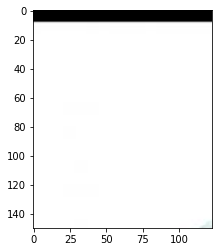

In [143]:
plt.imshow(tiles[1])

In [3]:
from SRGANupscaling.data import get_images_gcp, plot_image_comparison
from SRGANupscaling.params import STORAGE_LOCATION_KAGGLE_ORG_LR, STORAGE_LOCATION_KAGGLE_ORG_HR
from SRGANupscaling.model import image_upscale

In [14]:
tiles_upscale = image_upscale(tiles)

2022-07-14 11:58:26.021012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
tiles_upscale.shape

TensorShape([56, 600, 492, 3])

In [ ]:
tiles_upscale_arr = np.asarray(tiles_upscale)

In [29]:
tiles_upscale_arr.shape

(56, 600, 492, 3)

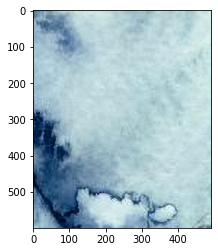

In [35]:
import matplotlib.pyplot as plt
plt.imshow(tiles_upscale_arr[25])

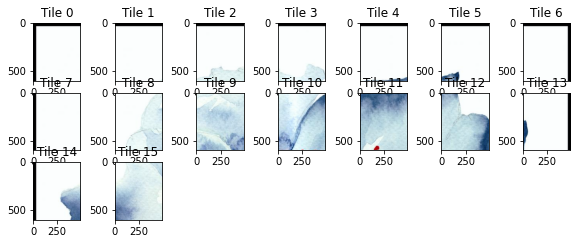

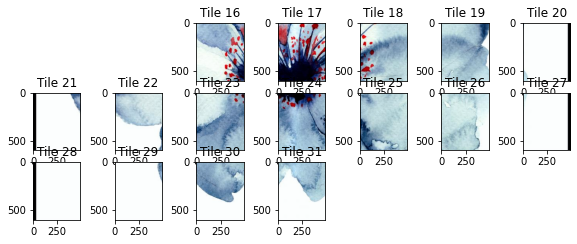

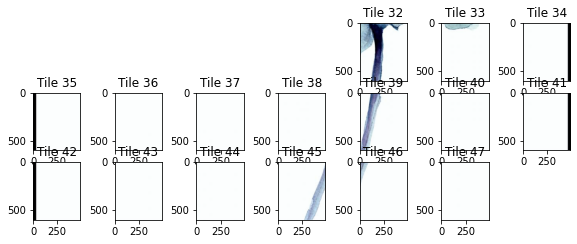

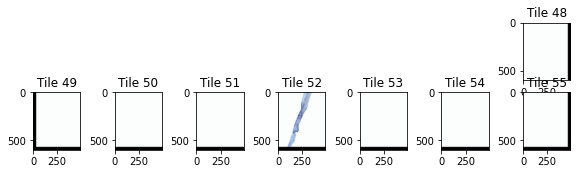

In [116]:
for i, tile in enumerate(tiles_upscale_arr):
    plt.figure(10+i//16, figsize = (10, 10))
    plt.subplot(8,7, i+1)
    plt.imshow(tile)
    plt.title(f'Tile {i}')

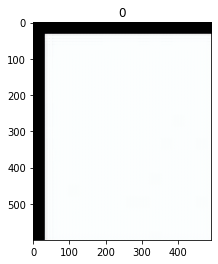

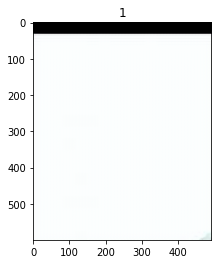

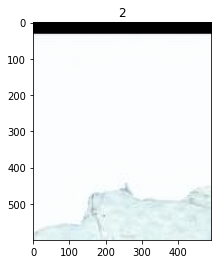

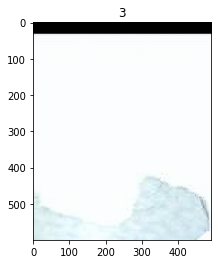

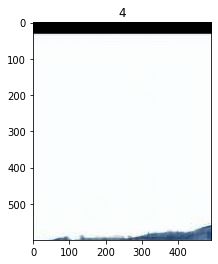

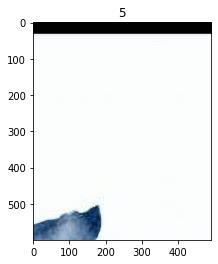

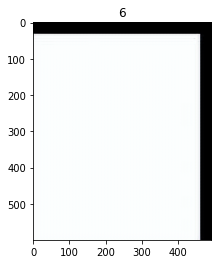

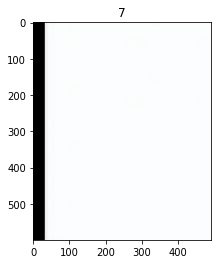

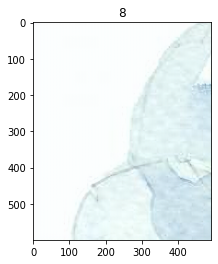

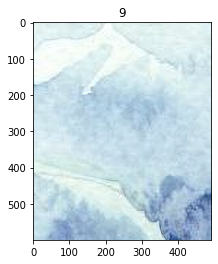

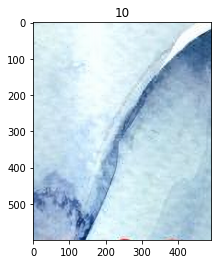

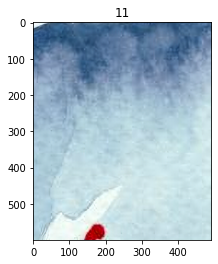

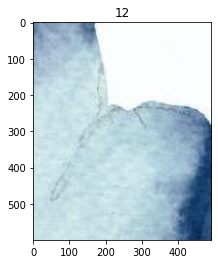

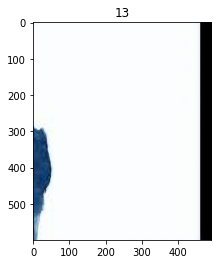

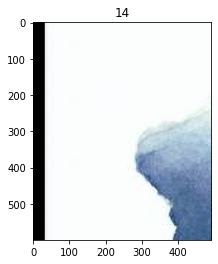

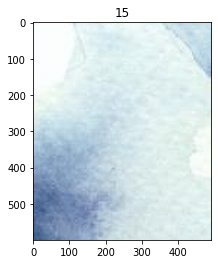

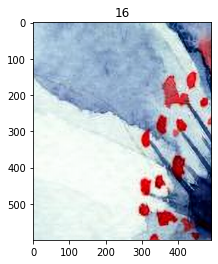

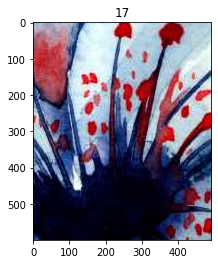

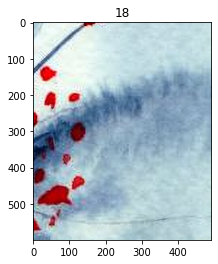

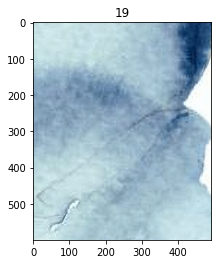

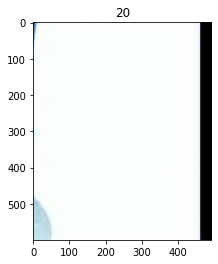

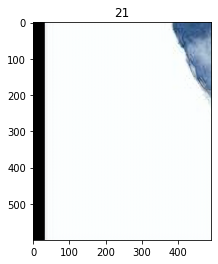

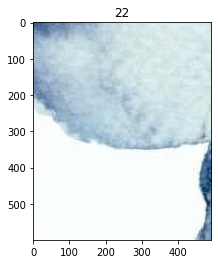

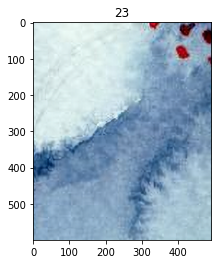

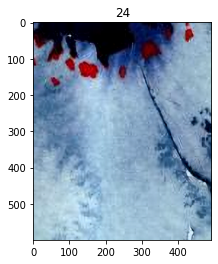

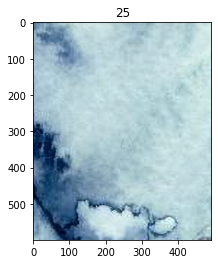

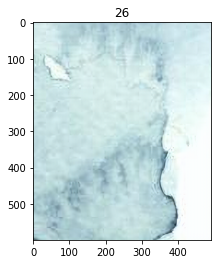

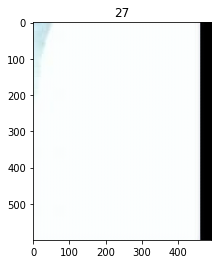

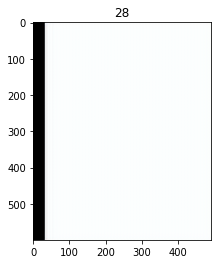

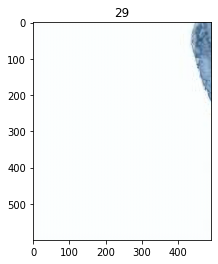

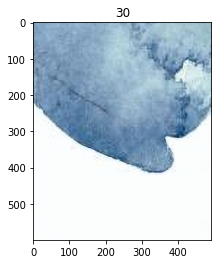

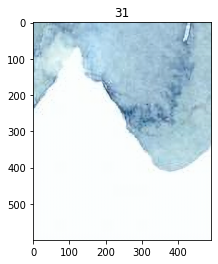

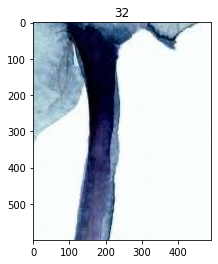

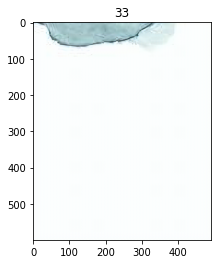

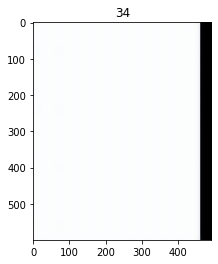

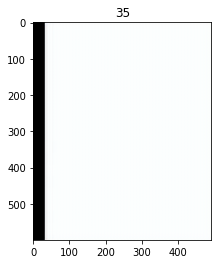

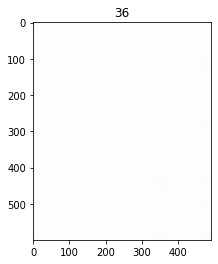

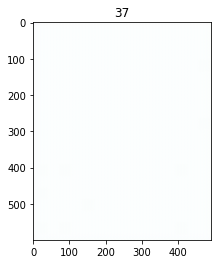

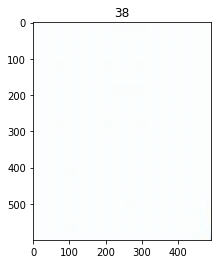

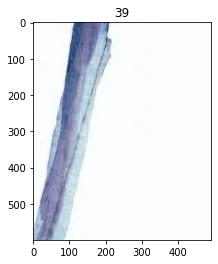

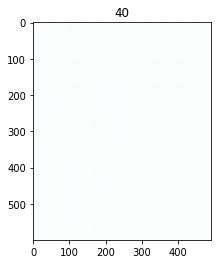

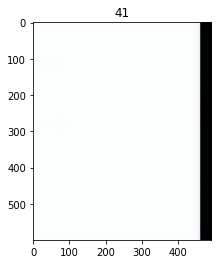

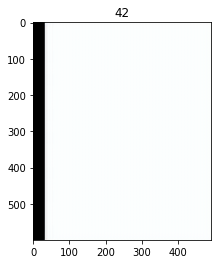

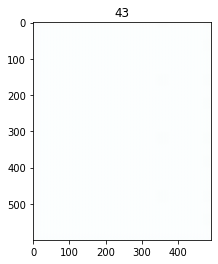

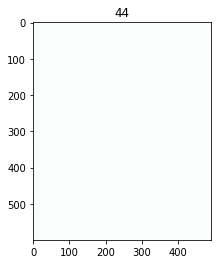

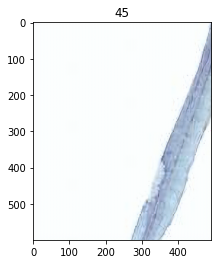

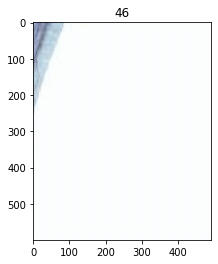

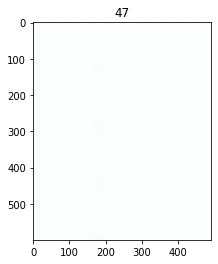

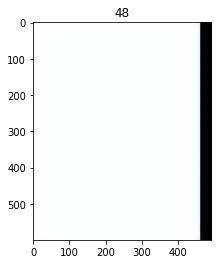

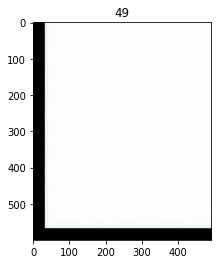

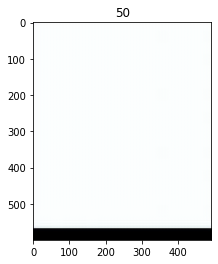

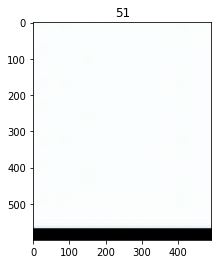

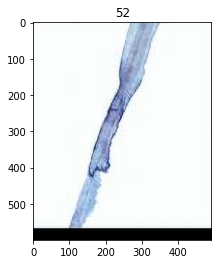

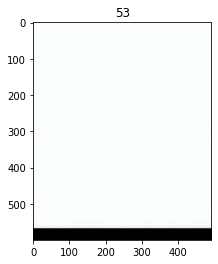

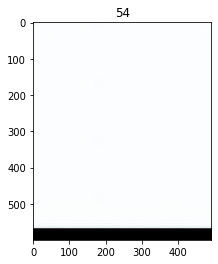

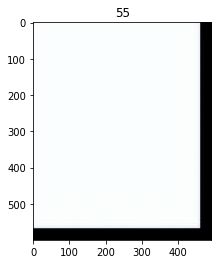

In [114]:
for i, tile in enumerate(tiles_upscale_arr):
    plt.imshow(tile)
    plt.title(i)
    plt.show()

In [134]:
tiles_upscale_arr.shape

(56, 600, 492, 3)

In [135]:
# (56, 600, 492, 3)
tiles_upscale_arr_re = tiles_upscale_arr.reshape(-1, 4, 4, 100, 100, 3).swapaxes(2, 3)
tiles_upscale_arr_re = tiles_upscale_arr.reshape(-1, 400, 400, 3)
tiles_upscale_arr_re.shape
plt.imshow(tiles_upscale_arr_re)

ValueError: cannot reshape array of size 49593600 into shape (4,4,100,100,3)

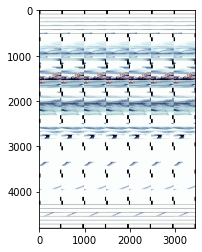

In [131]:
# (56, 600, 492, 3)
tiles_upscale_arr_re = tiles_upscale_arr.reshape(8, 7, 600, 492, 3).swapaxes(1,2)
tiles_upscale_arr_re = tiles_upscale_arr.reshape(8*600, 492*7, 3)
# tiles_upscale_arr_swap = np.swapaxes(tiles_upscale_arr, 1, -1)
tiles_upscale_arr_re.shape
plt.imshow(tiles_upscale_arr_re)

tuple